# Pymaceuticals Inc.
---

### Analysis

- Ramicane and Capomulin are two most effective drug regimen's with Ramicane slightly edging out the other
- There is a positive correlation between mouse weight and average tumor volume. 
- Results were not effected by gender of mouse but were highty related to weight
 

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st 
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")

# Display the data
combined_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [34]:
# Check the number of mice
num_mice = combined_data["Mouse ID"].nunique()

num_mice

249

In [35]:
# Check for mouse IDs with duplicate time points
duplicate_mouse_id = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"])]

# Display the data associated with the mouse ID having duplicate time points
if not duplicate_mouse_id.empty:
      print(duplicate_mouse_id)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [36]:
#Get all the data for the duplicate mouse ID
duplicate_mouse_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_id['Mouse ID'])]

duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [37]:
# Create a new DataFrame with the duplicate data removed
cleaned_data = combined_data[~combined_data["Mouse ID"].isin(duplicate_mouse_id["Mouse ID"])]

cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [38]:
# Check the number of mice again
num_mice_clean = cleaned_data["Mouse ID"].nunique()

num_mice_clean

248

## Summary Statistics

In [39]:
# Calculate the summary statistics for each regimen
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    STD='std',
    SEM='sem'
)

# Display the summary
summary_stats


,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [40]:
# Calculate summary statistics in a single line using aggregation
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Display the summary
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

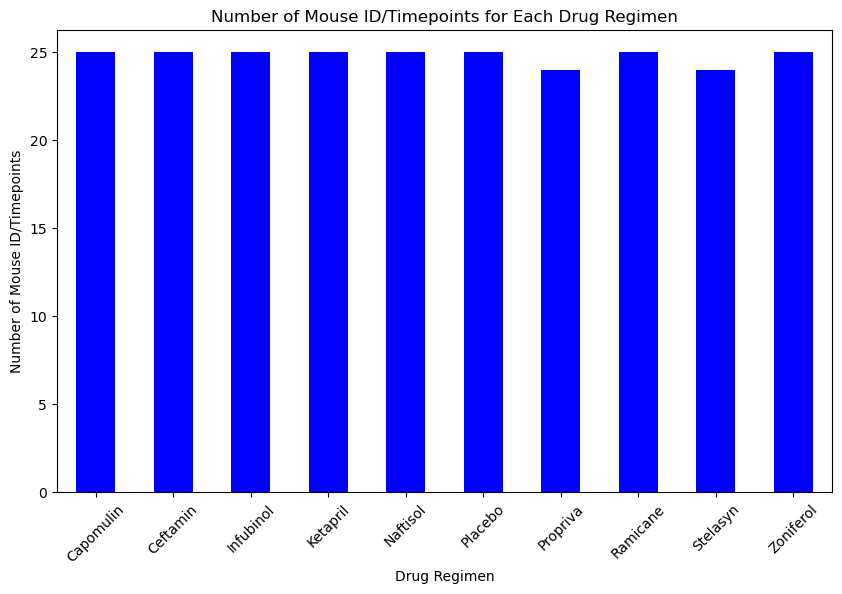

In [41]:
# Group the data by Drug Regimen and count the number of unique Mouse ID/Timepoint combinations
regimen_counts = cleaned_data.groupby('Drug Regimen').apply(lambda x: x['Mouse ID'].nunique())

# Create a bar chart using pandas
regimen_counts.plot(kind='bar', color='blue',figsize=(10, 6))
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
plt.title('Number of Mouse ID/Timepoints for Each Drug Regimen')
plt.xticks(rotation=45)
plt.show()

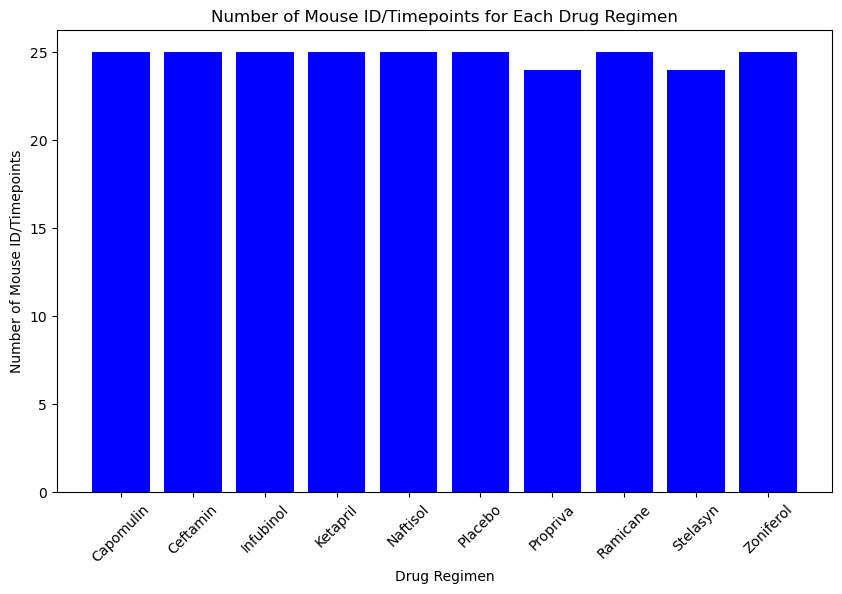

In [42]:
# Group the data by Drug Regimen and count the number of rows in each group
regimen_counts = cleaned_data.groupby('Drug Regimen').apply(lambda x: x['Mouse ID'].nunique())

# Create a bar chart using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
plt.title('Number of Mouse ID/Timepoints for Each Drug Regimen')
plt.xticks(rotation=45)
plt.show()

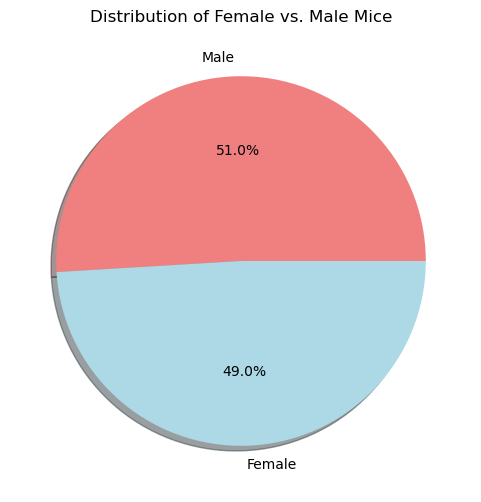

In [43]:
# Group the data and count the number of mice in each group
sex_distribution = cleaned_data['Sex'].value_counts()

# Create a pie chart using pandas
plt.figure(figsize=(6, 6))
sex_distribution.plot(kind='pie', shadow='True', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('')
plt.show()

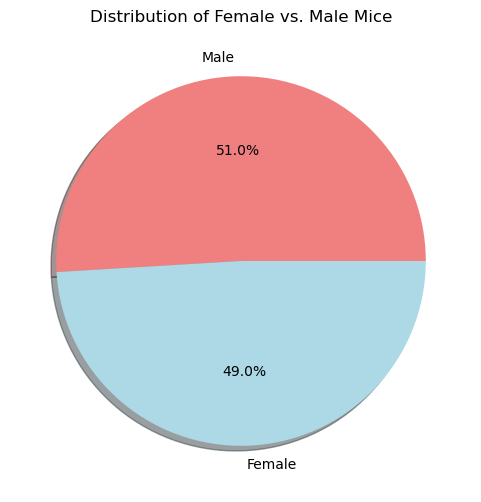

In [44]:
# Group the data and count the number of mice in each group
sex_distribution = cleaned_data['Sex'].value_counts()

# Create a pie chart using pyplot
plt.figure(figsize=(6, 6))
labels = sex_distribution.index
sizes = sex_distribution.values
colours = ['lightcoral', 'lightblue']
plt.pie(sizes, labels=labels, shadow='True', autopct='%1.1f%%', colors=colours)
plt.title('Distribution of Female vs. Male Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [45]:
# Create a list of treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the data for the regimens
final_time_data = cleaned_data[cleaned_data['Drug Regimen'].isin(treatment_regimens)]

# Group the data and find the last timepoint for each mouse
last_time_mouse = final_time_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge the dataframes to get the tumor volume at the last timepoint
last_tumor_volume = pd.merge(last_time_mouse, final_time_data, on=['Mouse ID', 'Timepoint'], how='left')[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

# Display the data
last_tumor_volume

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
...,...,...,...
95,y769,Ceftamin,68.594745
96,y793,Capomulin,31.896238
97,y865,Ceftamin,64.729837
98,z578,Ramicane,30.638696


In [46]:
# Create an empty list to fill with data
tumor_vol_data = []

# Look through each treatment regimen
for regimen in treatment_regimens:
    
    # Get the tumor volumes
    tumor_volumes = last_tumor_volume[last_tumor_volume['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    
    # Put the volume data in the list
    tumor_vol_data.append(tumor_volumes)
    
    # Calculate the IQR for the regimen
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    # Determine lower and upper bounds for outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr

    # Find outliers
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
   


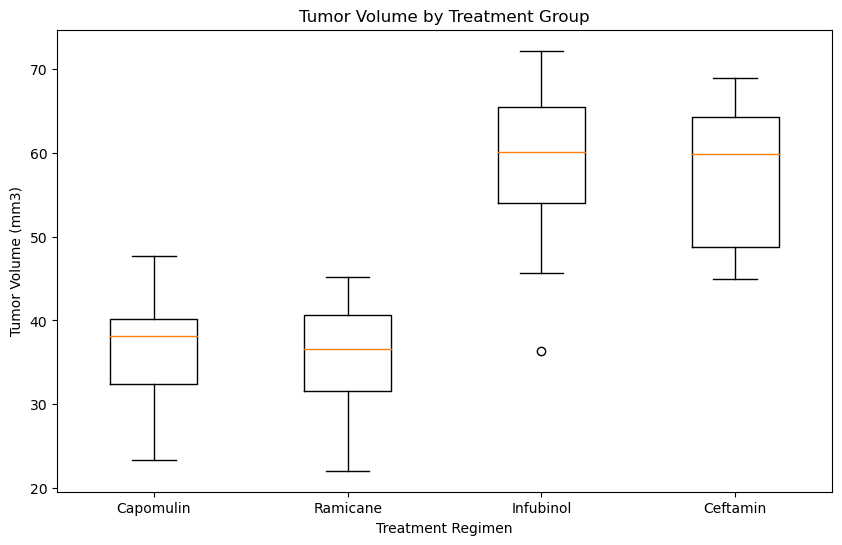

In [47]:
# Create a list of volume data for each regimen
tumor_vol_data = [last_tumor_volume[last_tumor_volume['Drug Regimen'] == regimen]['Tumor Volume (mm3)'] for regimen in treatment_regimens]

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatment_regimens)
plt.title('Tumor Volume by Treatment Group')
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

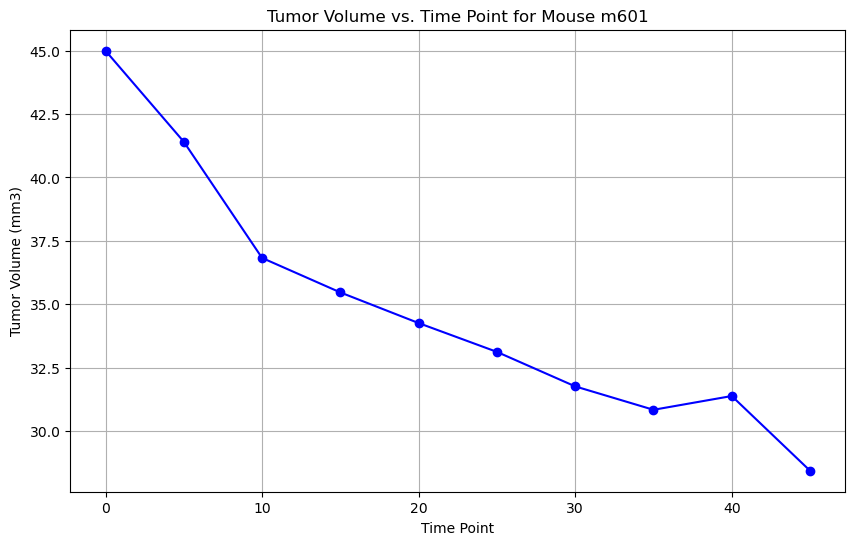

In [48]:
# Choose a specific mouse ID treated with Capomulin
specific_mouse_id = "m601"  # Replace with the actual Mouse ID

# Extract data for the selected mouse
selected_mouse_data = cleaned_data[(cleaned_data['Drug Regimen'] == 'Capomulin') & (cleaned_data['Mouse ID'] == specific_mouse_id)]

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')
plt.title(f"Tumor Volume vs. Time Point for Mouse {specific_mouse_id}")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.show()

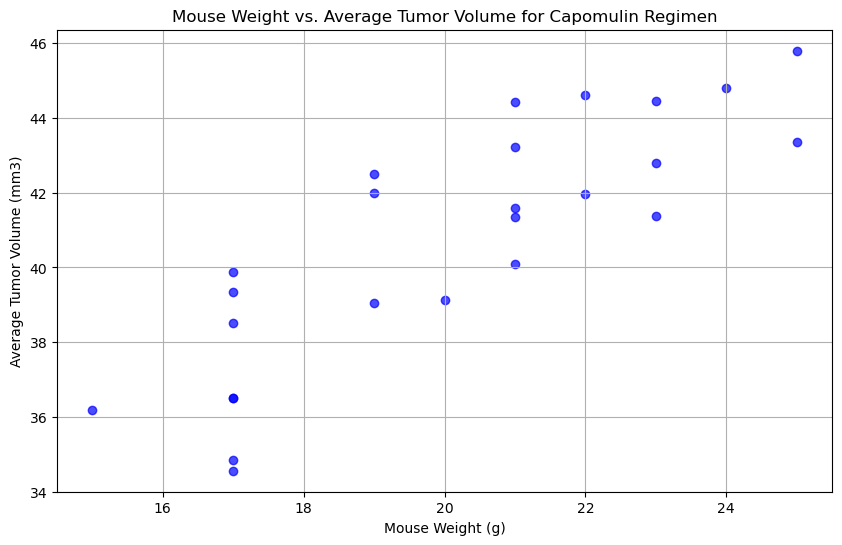

In [49]:
# Filter the data for the regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Group the data to calculate the average tumor volume and mouse weight
grouped_data = capomulin_data.groupby('Mouse ID').agg(Avg_Tumor_Volume=('Tumor Volume (mm3)', 'mean'), Weight=('Weight (g)', 'mean')).reset_index()

# Create a scatter chart
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['Weight'], grouped_data['Avg_Tumor_Volume'], marker='o', color='b', alpha=0.7)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()


## Correlation and Regression

Correlation: 0.84


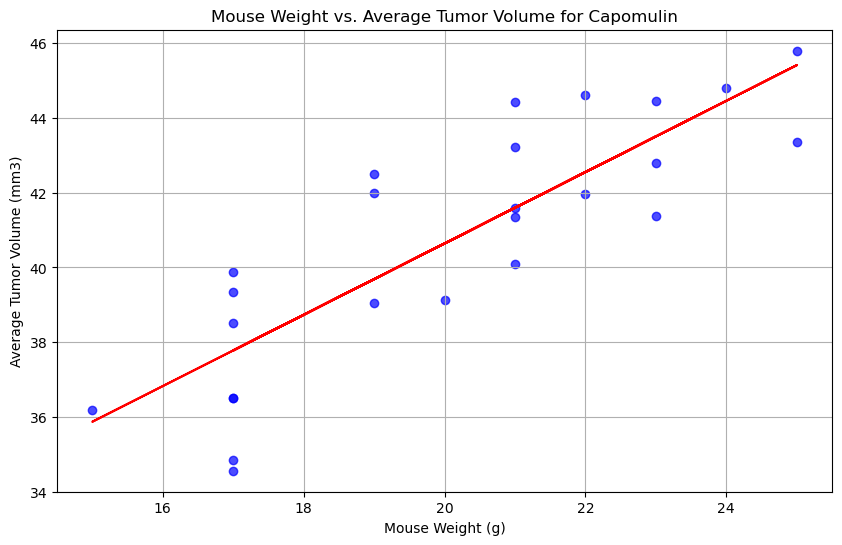

In [50]:
# Calculate the correlation
correlation = grouped_data['Weight'].corr(grouped_data['Avg_Tumor_Volume'])

# Create a scatter chart
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['Weight'], grouped_data['Avg_Tumor_Volume'], marker='o', color='b', alpha=0.7)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(grouped_data['Weight'], grouped_data['Avg_Tumor_Volume'])
regress_values = slope * grouped_data['Weight'] + intercept

# Add the regression line to the scatter plot
plt.plot(grouped_data['Weight'], regress_values, color='r')

# Display the correlation
print(f"Correlation: {correlation:.2f}")

plt.show()